In [27]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

# Load the pipeline with the same arguments (model, revision) that were used for training
model_id = "runwayml/stable-diffusion-v1-5"

unet = UNet2DConditionModel.from_pretrained("codyreading/dreambooth-car/checkpoint-100/unet")

# if you have trained with `--args.train_text_encoder` make sure to also load the text encoder
text_encoder = CLIPTextModel.from_pretrained("codyreading/dreambooth-car/checkpoint-100/text_encoder")

pipe = DiffusionPipeline.from_pretrained(
    model_id, unet=unet, text_encoder=text_encoder, dtype=torch.float16, use_safetensors=True
)
pipe.to("cuda")

HFValidationError: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'codyreading/dreambooth-car/checkpoint-100'. Use `repo_type` argument if needed.

: 

  0%|          | 0/50 [00:00<?, ?it/s]

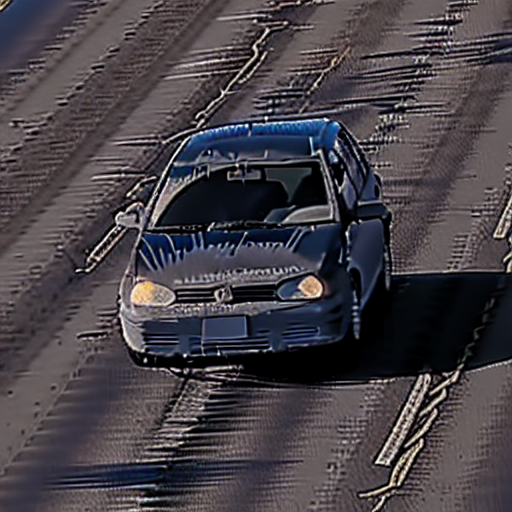

In [26]:
prompt = "A photo of sks car with grass on the side"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image